In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium

# Stop Question and Frisk

<center>
    <img src = https://thehill.com/sites/default/files/styles/thumb_small_article/public/bloomberg_mike.jpg?itok=E7KLwMl1 />
    </center>

### Data

<center>
    <img src = sqf_home.png />
    </center>

https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page

### Goal: Ask and Answer Questions

In [14]:
sqf = pd.read_csv('sqf-2015.csv')

In [22]:
sqf.head()

year  pct  ser_num  datestop  timestop recstat inout trhsloc  perobs  \
0  2015   61       18   1012015       315       1     O       P     2.0   
1  2015   22        5   1152015      1747       A     O       P     1.0   
2  2015   20       36   1292015      1745       1     O       P     1.0   
3  2015   20       38   1292015      1745       1     O       P     1.0   
4  2015   20       41   1292015      1745       1     O       P     1.0   

  crimsusp perstop typeofid explnstp othpers arstmade arstoffn sumissue  \
0   FELONY      10        V        Y       N        N                 N   
1   FELONY       4        V        Y       N        N                 N   
2     MISD      16        V        Y       N        N                 N   
3     MIDS      16        V        Y       Y        N                 N   
4     MISD      16        V        Y       Y        N                 N   

  sumoffen  compyear  comppct  ... rescode premtype       premname addrnum  \
0                  0        0  ...                          STREET           
1                  0        0  ...                   119 W. 104 ST           
2                  0        0  ...                          STREET     472   
3                  0        0  ...                          STREET     472   
4                  0        0  ...                          STREET     472   

            stname                      stinter         crossst aptnum  \
0                                      AVENUE W  EAST 28 STREET          
1                   TRANSVERSE ROAD NUMBER FOUR      WEST DRIVE          
2  COLUMBUS AVENUE               WEST 83 STREET  WEST 82 STREET          
3  COLUMBUS AVENUE               WEST 83 STREET  WEST 82 STREET          
4  COLUMBUS AVENUE               WEST 83 STREET  WEST 82 STREET          

        city state zip addrpct sector beat post   xcoord   ycoord dettypCM  \
0   BROOKLYN                61      E    7       1000091   156314       CM   
1  MANHATTAN                22      E   14        994617   227693       CM   
2  MANHATTAN                20      H        16   991510   225019       CM   
3  MANHATTAN                20      H        16   991510   225019       CM   
4  MANHATTAN                20      H        16   991510   225019       CM   

  lineCM detailCM  
0      1       14  
1      1       20  
2      1       78  
3      1       78  
4      1       78  

[5 rows x 112 columns]

In [24]:
[col for col in sqf.columns]

['year',
 'pct',
 'ser_num',
 'datestop',
 'timestop',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'crimsusp',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',


In [95]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(sqf, geometry = gpd.points_from_xy(sqf.xcoord, sqf.ycoord))

In [99]:
race_code = {'U': 'unknown',
             'A':'ASIAN/PACIFIC ISLANDER',
'B':'BLACK',
'I':'AMERICAN INDIAN/ALASKAN NATIVE',
'P':'BLACK-HISPANIC',
'Q':'WHITE-HISPANIC',
'W':'WHITE',
'X':'UNKNOWN',
'Z':'OTHER'}

In [100]:
def race_coder(x): return race_code[x]

In [102]:
gdf['race_named'] = gdf.race.apply(race_coder)

Text(0.0, 1, 'Stop Question and Frisk by Race')

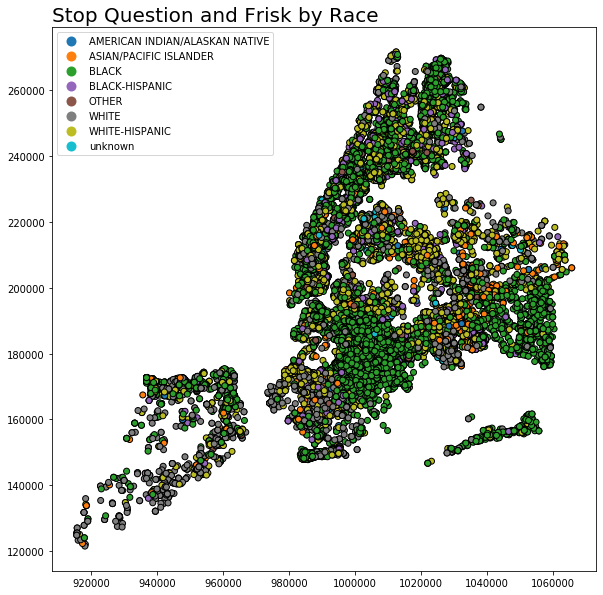

In [105]:
gdf.plot(column = 'race_named', legend = True, figsize = (18, 10), edgecolor = 'black')
plt.title('Stop Question and Frisk by Race', loc = 'left', fontsize = 20)

In [3]:
sqf_2019 = pd.read_excel('sqf-2019.xlsx')

In [4]:
sqf_2019.head()

STOP_ID_ANONY STOP_FRISK_DATE STOP_FRISK_TIME  YEAR2   MONTH2       DAY2  \
0              1      2019-01-02        14:30:00   2019  January  Wednesday   
1              2      2019-01-08        02:30:00   2019  January    Tuesday   
2              3      2019-01-12        16:54:00   2019  January   Saturday   
3              4      2019-01-14        21:21:00   2019  January     Monday   
4              5      2019-01-15        18:50:00   2019  January    Tuesday   

        STOP_WAS_INITIATED RECORD_STATUS_CODE ISSUING_OFFICER_RANK  \
0    Based on C/W on Scene                APP                  POM   
1  Based on Self Initiated                APP                  POM   
2       Based on Radio Run                APP                  POM   
3       Based on Radio Run                APP                  POM   
4       Based on Radio Run                APP                  POM   

   ISSUING_OFFICER_COMMAND_CODE  ... STOP_LOCATION_PRECINCT  \
0                             1  ...                      1   
1                             1  ...                      1   
2                             1  ...                      1   
3                             1  ...                      1   
4                             1  ...                      1   

   STOP_LOCATION_SECTOR_CODE STOP_LOCATION_APARTMENT  \
0                          C                  (null)   
1                          C                  (null)   
2                          D                  (null)   
3                          (                  (null)   
4                          D                  (null)   

  STOP_LOCATION_FULL_ADDRESS STOP_LOCATION_STREET_NAME  STOP_LOCATION_X  \
0           230 VESEY STREET              VESEY STREET           979667   
1             9 WHITE STREET              WHITE STREET           982650   
2          131 SPRING STREET             SPRING STREET           984063   
3    GRAND STREET && 6TH AVE              GRAND STREET           982848   
4         32 THOMPSON STREET           THOMPSON STREET           983100   

  STOP_LOCATION_Y  STOP_LOCATION_ZIP_CODE STOP_LOCATION_PATROL_BORO_NAME  \
0          199737                  (null)                           PBMS   
1          201326                  (null)                           PBMS   
2          203033                  (null)                           PBMS   
3          202677                  (null)                           PBMS   
4          202705                  (null)                           PBMS   

  STOP_LOCATION_BORO_NAME  
0               MANHATTAN  
1               MANHATTAN  
2               MANHATTAN  
3               MANHATTAN  
4               MANHATTAN  

[5 rows x 83 columns]